<a href="https://colab.research.google.com/github/2019mohamed/Team3-Project/blob/master/face_recognition/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 21 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=92f29709bed6187b187930488c01779b94bb8a87d8b0d2c6d9df80b5cbc69e6f
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [2]:
import face_recognition
import numpy as np
known_face_encodings = []
known_face_names = []

In [3]:

def add_face (image, name):
  hmada_image = face_recognition.load_image_file(image)
  location = face_recognition.face_locations(hmada_image)
  face_encodings = face_recognition.face_encodings(hmada_image, location)[0]
  known_face_encodings.append(face_encodings)
  known_face_names.append(name)

def get_name (image):
  name = 'unknown'
  hmada_image = face_recognition.load_image_file(image)
  location = face_recognition.face_locations(hmada_image)
  face_encodings = face_recognition.face_encodings(hmada_image, location)[0]
  face_distances  = face_recognition.face_distance(known_face_encodings, face_encodings)
  matches = face_recognition.compare_faces(known_face_encodings, face_encodings)
  best_match_index = np.argmin(face_distances)
  if matches[best_match_index]:
    name = known_face_names[best_match_index]
  return name



In [4]:
#add_face('me2.jpg' , 'Anwar')
add_face('obma.jpg' , 'Obama')
add_face('erdos2.jpg', 'erdos')
print(known_face_names)

['Obama', 'erdos']


In [5]:
get_name('geo.jpg')

'unknown'

In [6]:
add_face('geo.jpg', 'geoff')

In [7]:
get_name('geo.jpg')

'geoff'

In [8]:
add_face('me3.jpg','Anwar')
print(known_face_names)

['Obama', 'erdos', 'geoff', 'Anwar']


In [9]:
add_face('erdos.jpg', 'erdos')
print(known_face_names)

['Obama', 'erdos', 'geoff', 'Anwar', 'erdos']


In [10]:
add_face('obma2.jpg' , 'Obama')
print(known_face_names)

['Obama', 'erdos', 'geoff', 'Anwar', 'erdos', 'Obama']


In [11]:
add_face('me.jpeg','Anwar')
add_face('me2.jpg','Anwar')
print(known_face_names)

['Obama', 'erdos', 'geoff', 'Anwar', 'erdos', 'Obama', 'Anwar', 'Anwar']


In [12]:
add_face('geo2.jpg','geoff')
print(known_face_names)

['Obama', 'erdos', 'geoff', 'Anwar', 'erdos', 'Obama', 'Anwar', 'Anwar', 'geoff']


[[-0.44410092  0.21326592]
 [ 0.13199481  0.17110082]
 [ 0.38170632 -0.01010649]
 [-0.12910786 -0.325116  ]
 [ 0.0972666   0.12784534]
 [-0.29404051  0.36639094]
 [-0.1091731  -0.33934612]
 [-0.10778832 -0.32497205]
 [ 0.47324298  0.12093764]]


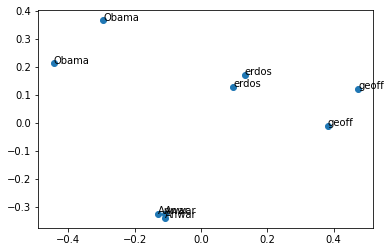

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2).fit_transform(known_face_encodings)
print(pca)
plt.scatter(pca[:,0],pca[:,1])
for i, name in enumerate(known_face_names):
  plt.annotate(name , (pca[i,0] , pca[i,1]))

In [14]:
from IPython.display import display, Javascript, Image,Audio
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [15]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

In [16]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # save image
  cv2.imwrite(filename, img)

  return filename

In [17]:
!pip install gTTS

<IPython.core.display.Javascript object>

Saved to photo.jpg


Anwar


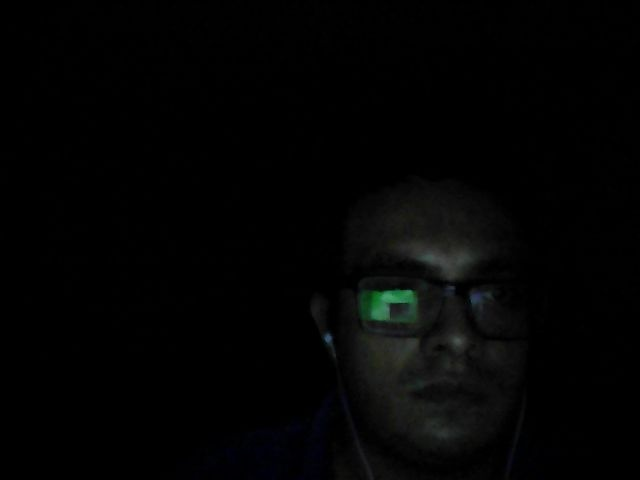

In [19]:
from gtts import gTTS
language = 'en'
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  myobj = gTTS(text="processing", lang=language, slow=False)
  myobj.save("welcome.mp3")
  display(Audio("welcome.mp3",autoplay=True))

  name = get_name(filename)

  myobj = gTTS(text=name, lang=language, slow=False)
  myobj.save("welcome.mp3")
  display(Audio("welcome.mp3",autoplay=True))
  if name == 'unknown':
    filename = take_photo('photo.jpg')
    myobj = gTTS(text='Enter your name', lang=language, slow=False)
    myobj.save("welcome.mp3")
    display(Audio("welcome.mp3",autoplay=True))
    name = input('Enter your name')

    myobj = gTTS(text="Face learning", lang=language, slow=False)
    myobj.save("welcome.mp3")
    display(Audio("welcome.mp3",autoplay=True))
      
    add_face(filename, name)
  
    myobj = gTTS(text=name, lang=language, slow=False)
    myobj.save("welcome.mp3")
    display(Audio("welcome.mp3",autoplay=True))
  print(name)
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
!pip install SpeechRecognition 

     |████████████████████████████████| 32.8 MB 39 kB/s 


In [ ]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 1s (249 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 155047 files and directories currently installed.)
Preparing to 

In [ ]:
!pip install PyAudio

  Using cached PyAudio-0.2.11.tar.gz (37 kB)
  Created wheel for PyAudio: filename=PyAudio-0.2.11-cp37-cp37m-linux_x86_64.whl size=52599 sha256=8c270cd0e454debf859e642a1e88a9df7f92f82c2ddd6d5e5d8efd422e1dca16
  Stored in directory: /root/.cache/pip/wheels/40/2e/4c/b71e7e96c861a46e6213bc6bb482b94dcf293a92c5e736c1ec
Successfully built PyAudio


In [ ]:
# all imports
from io import BytesIO
from base64 import b64decode
from google.colab import output
from IPython.display import Javascript

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  print("Speak Now...")
  display(Javascript(RECORD))
  sec += 1
  s = output.eval_js('record(%d)' % (sec*1000))
  print("Done Recording !")
  b = b64decode(s.split(',')[1])
  return b #byte stream

In [ ]:
audio = record(5)

Speak Now...


<IPython.core.display.Javascript object>

Done Recording !


In [ ]:
import IPython.display as ipd

ipd.display(ipd.Audio(audio))

In [ ]:
import speech_recognition as sr
r = sr.Recognizer()
try:
  text = r.recognize_google_cloud(audio, credentials_json=GOOGLE_CLOUD_SPEECH_CREDENTIALS)
  print("You said : {}".format(text))
except:
  print("Sorry could not recognize what you said")

Sorry could not recognize what you said
